In [1]:
from model_building import ModelBuilding
import numpy as np

In [2]:
model = ModelBuilding()

In [3]:
features =['activity','entries', 'funded_amount', "country_code",
       'len_teg', 'lender_count', 'num_borrowers', 'lat','long',"partner_id",
       'repayment_interval', 'repayment_term', 'sector']

In [4]:
['activity', 'basket_amount', 'country_code',
       'description_lang', 'entries', 'funded_amount', 'geo_level', 'lat',
       'len_teg', 'lender_count', 'long', 'num_borrowers', 'partner_id',
       'repayment_interval', 'repayment_term', 'sector', 'theme', 'town',
       'num_male', 'num_female', 'male_ratio', 'number_of_picture',
       'ratio_of_picture']

['activity',
 'basket_amount',
 'country_code',
 'description_lang',
 'entries',
 'funded_amount',
 'geo_level',
 'lat',
 'len_teg',
 'lender_count',
 'long',
 'num_borrowers',
 'partner_id',
 'repayment_interval',
 'repayment_term',
 'sector',
 'theme',
 'town',
 'num_male',
 'num_female',
 'male_ratio',
 'number_of_picture',
 'ratio_of_picture']

In [5]:
model.run_models(features)

In [6]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
model.recall_classifier

[0.62115644942951076, 0.5716495842196867, 0.23593115451556759]

In [8]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(model.y_test, model.proba_list[2][:,1])

In [9]:
roc_auc = auc(false_positive_rate, true_positive_rate)

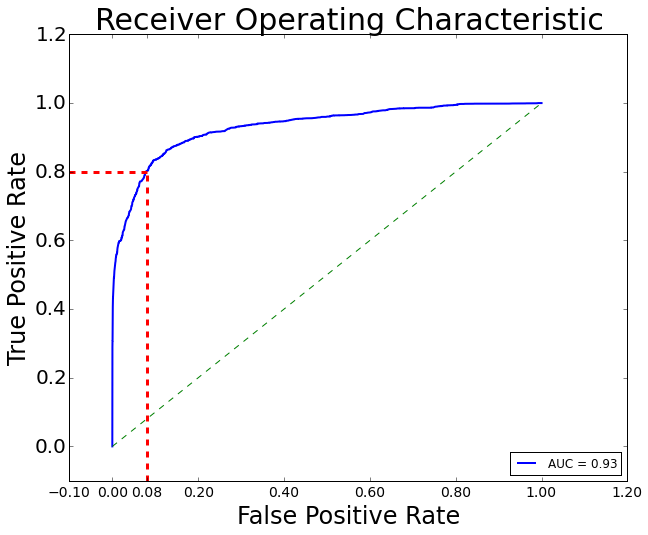

In [49]:
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic', fontsize= 30)
plt.plot(false_positive_rate, true_positive_rate, 'b',linewidth =2,
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.plot([0.08,0.08],[-0.1,0.8], 'r--', linewidth =3)
plt.plot([-0.1,0.08],[0.8,0.8], 'r--', linewidth =3)
plt.ylabel('True Positive Rate', fontsize= 24)
plt.xlabel('False Positive Rate', fontsize=24)
plt.xticks([-0.1,0,0.08,0.2, 0.4, 0.6, 0.8, 1,1.2],fontsize=14)
plt.yticks(fontsize=20)
plt.show()

In [168]:
model.X_test

array([[  707],
       [  574],
       [  582],
       ..., 
       [12440],
       [12636],
       [  859]])

In [28]:
indicies = np.argsort(model.proba_list[0][:,1])[::-1]
profit = []
for i in xrange(0,len(indicies),1000):
    pred_false = indicies[i:]
    y_predict = np.ones(len(indicies))
    #Starting from the largest threshold for predicting positive
    #Everything started -ve with max threshold (p) for positive
    #Each loop move one p down
    #Could be a problem if there are a lot with same probability
    y_predict[pred_false] = 0
    rates = confusion_rates(confusion_matrix(model.y_test, y_predict))
    x = np.sum(class_probs * rates * cb1)
    profit.append(x)

([<matplotlib.axis.YTick at 0x7f54dc70b450>,
 <a list of 6 Text yticklabel objects>)

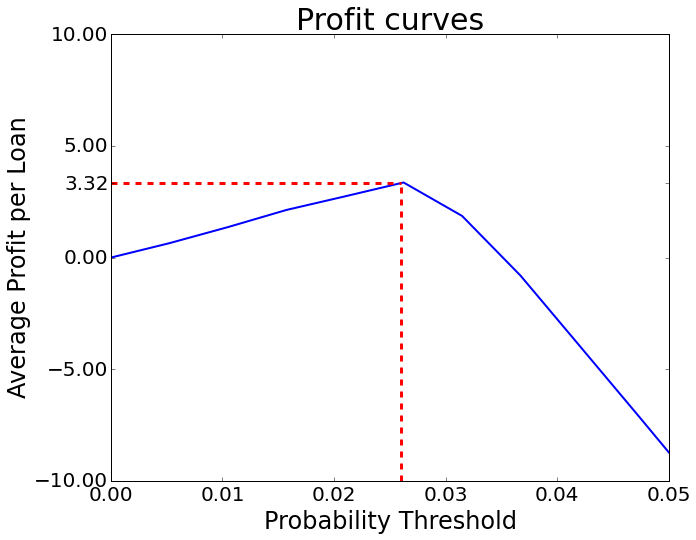

In [44]:
plt.figure(figsize=(10,8))
percentages = np.arange(0, len(indicies),1000) /float(len(indicies))
plt.plot(percentages, profit, linewidth =2)
plt.ylabel('Average Profit per Loan', fontsize= 24)
plt.xlabel('Probability Threshold', fontsize= 24)
plt.title('Profit curves', fontsize= 30)
plt.ylim(-10,10)
plt.xlim(0.0,0.05)
plt.plot([0.026,0.026],[-100,3.32], 'r--', linewidth =3)
plt.plot([0,0.026],[3.32,3.32], 'r--', linewidth =3)
plt.xticks(fontsize =20)
plt.yticks([-10,-5,0, 3.32,5,10],fontsize=20)


[ 0.3  0.5  0.7  0.9  1.1  1.3]


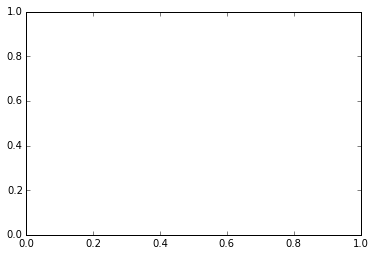

In [36]:
print list(plt.xticks())[0] + [0.3]

In [20]:
def confusion_rates(cm):
    [[tn, fp], [fn, tp]] = cm

    N = fp + tn
    P = tp + fn

    tpr = tp / float(P)
    fpr = fp / float(N)
    fnr = fn / float(P)
    tnr = tn / float(N)

    return np.array([[tpr, fpr], [fnr, tnr]])

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
pos = np.sum(model.y_test == 1) / float(len(model.y_test))
neg = 1 - pos
class_probs = np.array([pos, neg])

In [23]:
class_probs

array([ 0.02712812,  0.97287188])

In [24]:
cb1 = np.array([[565, -607],
               [0, 0]])

In [25]:
cb1

array([[ 565, -607],
       [   0,    0]])

In [116]:
model.c_matrix_classifier[0]

array([[183486,   1957],
       [  1942,   3229]])

In [8]:
from sklearn.externals.six import StringIO  

from sklearn import tree

In [88]:
with open("poject.dot", 'w') as f:
    f = tree.export_graphviz(model.classifiers[0], out_file=f)

NameError: name 'tree' is not defined

In [89]:
x = model.classifiers[2].feature_importances_

In [90]:
for number, precentage in enumerate(x):
    print precentage, features[number]

0.0809491839501 activity
0.209275684116 entries
0.136685422772 funded_amount
0.0346467923542 lender_count
0.0909978012934 num_borrowers
0.0943826270564 repayment_interval
0.331594929461 repayment_term
0.0214675589962 sector


In [107]:
profit

[0.0,
 0.60306168487099598,
 1.3229458486784811,
 1.9137104305035315,
 2.6766344549718282,
 3.3227360005036362,
 1.9029242343164725,
 -0.73430073341937252,
 -3.8572612714700938,
 -6.9925189125667568,
 -10.133925105186398,
 -13.232291437145228,
 -16.373697629764862,
 -19.490509616292613,
 -22.625767257389278,
 -25.754876346962973,
 -28.865539781967744,
 -32.000797423064412,
 -35.099163755023241,
 -38.215975741550984,
 -41.357381934170618,
 -44.480342472221345,
 -47.578708804180174,
 -50.726263548322791,
 -53.849224086373511,
 -56.959887521378292,
 -60.064402404860083,
 -63.18121439138784,
 -66.304174929438545,
 -69.433284019012248,
 -72.543947454017029,
 -75.660759440544766,
 -78.789868530118454,
 -81.906680516646205,
 -85.054235260788801,
 -88.177195798839534,
 -91.300156336890268,
 -94.435413977986926,
 -97.552225964514676,
 -100.66288939951944,
 -103.81044414366205,
 -106.92725613018982,
 -110.05021666824054,
 -113.13628589715341,
 -116.26539498672709,
 -119.40680117934674,
 -122.511